In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.optimize import curve_fit
from typing import List

plt.style.use("bmh")
plt.rcParams["xtick.minor.visible"] = True
plt.rcParams["ytick.minor.visible"] = True

In [7]:
def cargar_datos(file_name : str) -> list:

    # Cargamos los datos
    with open(file_name, "rb") as f:
        dic = pickle.load(f)
    # Hago una lista con los valores de frecuencia que alimentamos con el generador de funciones
    freq_values_keys = list(dic.keys())
    # Le sacamos la "Hz" a las keys
    freq_values = [float(freq[:-2]) for freq in freq_values_keys]
    t1, V1 = [dic[f'{freq}Hz']['t_1'] for freq in freq_values], [dic[f'{freq}Hz']['V_1'] for freq in freq_values]
    t2, V2 = [dic[f'{freq}Hz']['t_2'] for freq in freq_values], [dic[f'{freq}Hz']['V_2'] for freq in freq_values]
    amp1 = [np.max(v1)-np.min(v1) for v1 in V1] # para ver los datos sobre la hora, hay que calcular bien esto
    amp2 = [np.max(v2)-np.min(v2) for v2 in V2] # para ver los datos sobre la hora, hay que calcular bien esto

    # Creamos una lista para guardar todos los datos que nos interesan
    lista_mediciones = [freq_values, t1, V1, t2, V2, amp1, amp2]

    return lista_mediciones

In [70]:
file_names = ["Fuente de corriente/Barrido sinusoidal a 0.5 V de amp y 2 V de offset.pickle",
              "Tiempo de respuesta del laser/Barrido sinusoidal a 0.5 V de amp y 2 V de offset con R=50 ohm.pickle"]
labels = ["Fuente de corriente", "Láser"]
colors = ["b", "g"]
freqs = []
Ts = []

def sin_func(t:list, A: float, w: float,phi: float):
    return abs(A)*np.cos(w*np.array(t)+phi)

def ajustar_sinusoidales(t: List[np.ndarray], V: List[np.ndarray], freq_list: List[np.ndarray]):
    amp_list = []
    for i in range(len(V)):
        suggested_amp = (max(V[i]-np.mean(V[i]))-min(V[i]-np.mean(V[i])))/2
        suggested_w = 2*np.pi*freq_list[i]
        popt, pcov = curve_fit(sin_func, t[i], V[i]-np.mean(V[i]),p0 = [suggested_amp, suggested_w, 1], bounds =([suggested_amp-0.001, suggested_w-10,-np.inf], [suggested_amp+0.001, suggested_w+10, np.inf]), maxfev = 5000)

        amp = popt[0]

        print(f"La frec es {popt[1]/(2*np.pi)} sugerida: {suggested_w/(2*np.pi)}")
        print(f"La amp es {popt[0]} amp sugerida {suggested_amp}")
        amp_list.append(amp)
        plt.figure()
        plt.plot(t[i], V[i]-np.mean(V[i]),".")
        plt.plot(t[i], sin_func(t[i],*popt), "--k")
        plt.show()
    return amp_list

La frec es 10.000010411801167 sugerida: 10.0
La amp es 0.027599788480525755 amp sugerida 0.0266


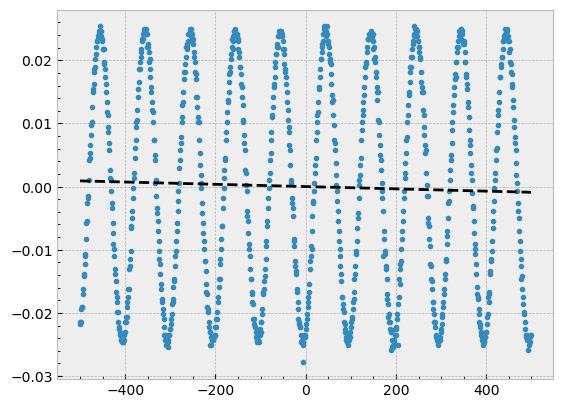

La frec es 798.9595783310448 sugerida: 798.9473684210526
La amp es 0.030600000000000006 amp sugerida 0.0316


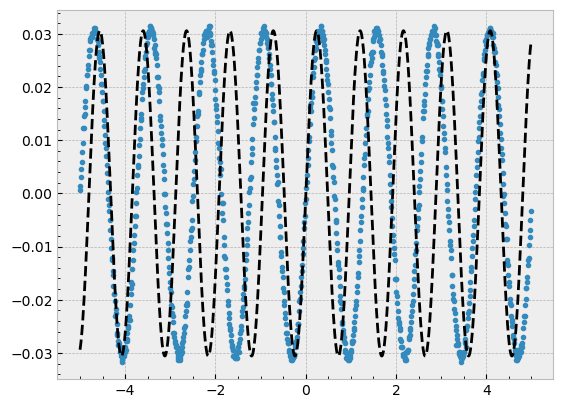

La frec es 1587.960883360664 sugerida: 1587.8947368421052
La amp es 0.032600000000000004 amp sugerida 0.0336


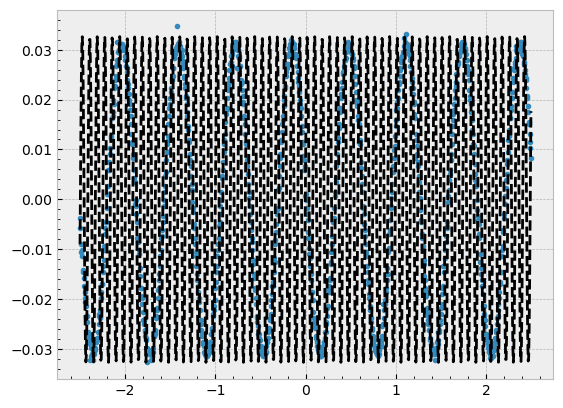

La frec es 2376.430311651418 sugerida: 2376.842105263158
La amp es 0.03160000000000001 amp sugerida 0.032600000000000004


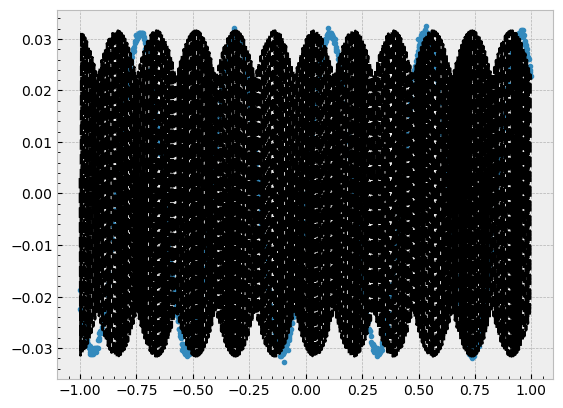

La frec es 3165.925404115574 sugerida: 3165.7894736842104
La amp es 0.03120000000000001 amp sugerida 0.032200000000000006


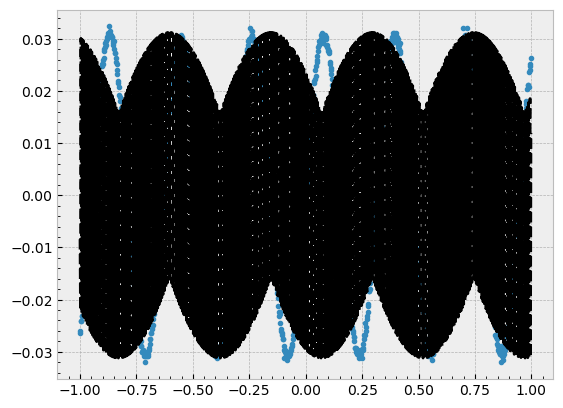

La frec es 3954.9282356484687 sugerida: 3954.7368421052633
La amp es 0.03140000000000001 amp sugerida 0.032400000000000005


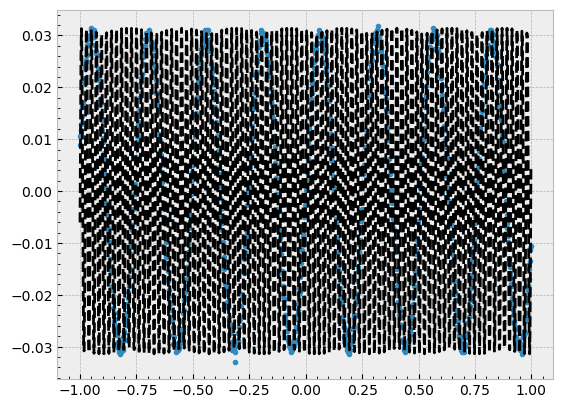

La frec es 4743.881295289171 sugerida: 4743.684210526316
La amp es 0.033400000000000006 amp sugerida 0.0344


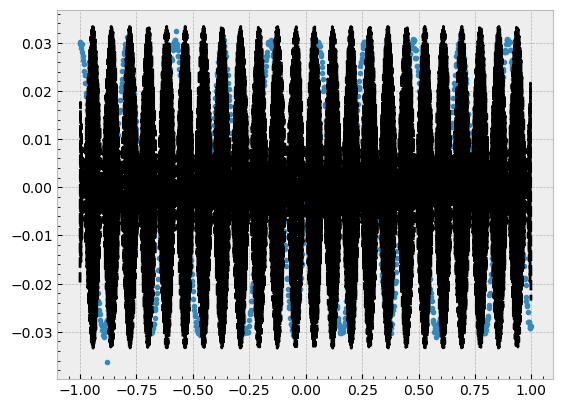

La frec es 5532.681760475786 sugerida: 5532.631578947368
La amp es 0.029800000000000004 amp sugerida 0.0308


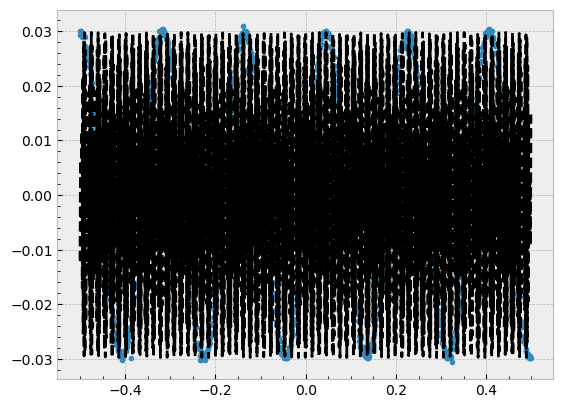

La frec es 6322.078335629467 sugerida: 6321.578947368421
La amp es 0.029200000000000004 amp sugerida 0.0302


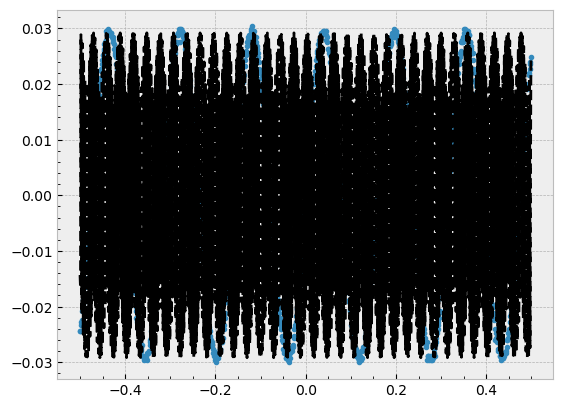

La frec es 7110.766955936634 sugerida: 7110.526315789474
La amp es 0.031400000000000004 amp sugerida 0.0324


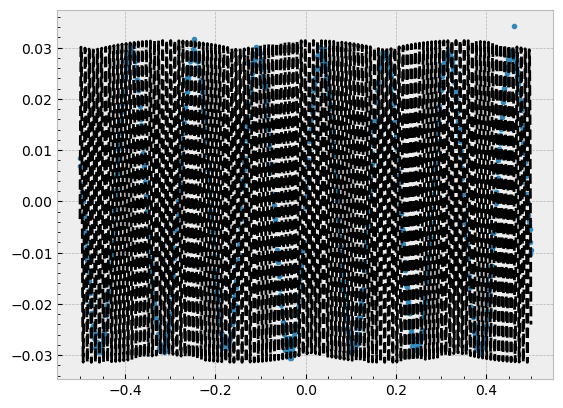

La frec es 7899.794595637286 sugerida: 7899.473684210525
La amp es 0.028600000000000004 amp sugerida 0.0296


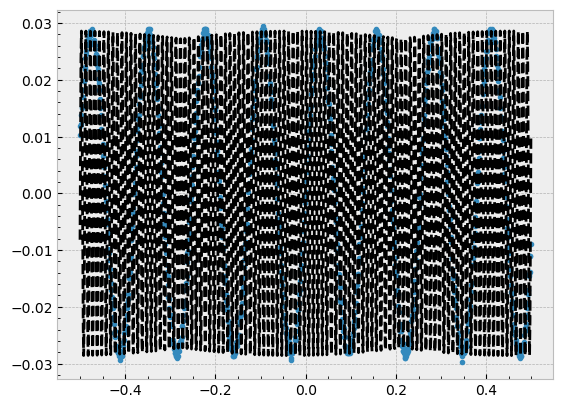

La frec es 8688.810949278924 sugerida: 8688.421052631578
La amp es 0.028800000000000006 amp sugerida 0.029800000000000004


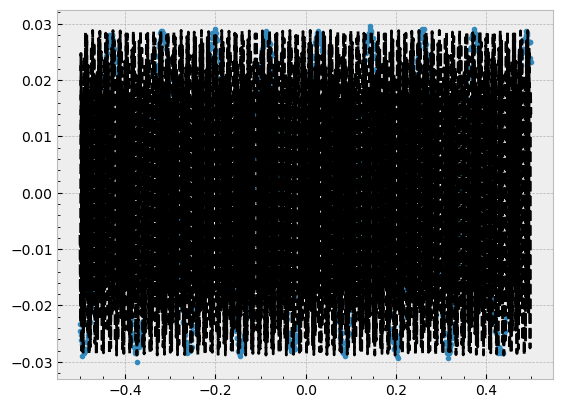

La frec es 9477.767256974685 sugerida: 9477.368421052632
La amp es 0.031400000000000004 amp sugerida 0.0324


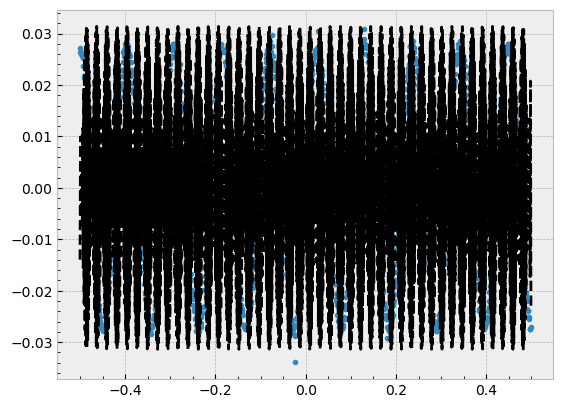

La frec es 10266.11536338509 sugerida: 10266.315789473683
La amp es 0.027200000000000005 amp sugerida 0.028200000000000003


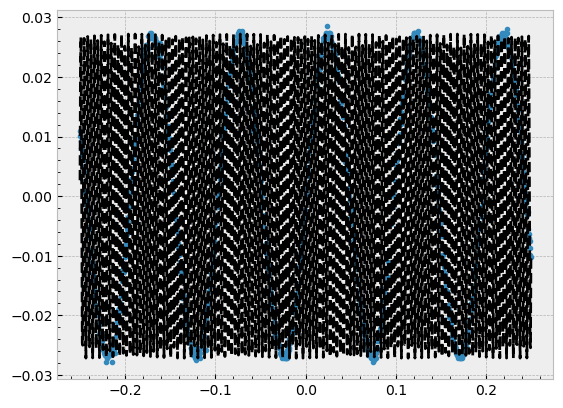

La frec es 11055.5229401216 sugerida: 11055.263157894737
La amp es 0.027600000000000003 amp sugerida 0.0286


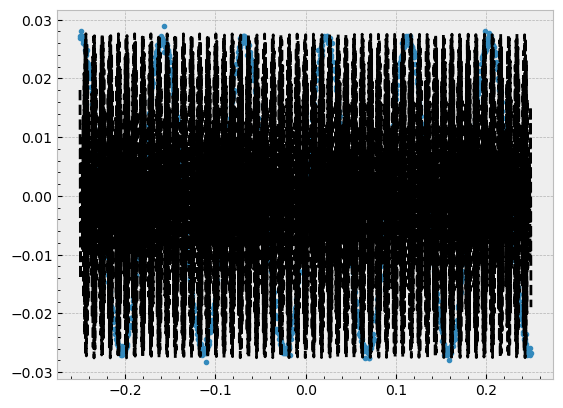

La frec es 11843.512312663379 sugerida: 11844.210526315788
La amp es 0.0268 amp sugerida 0.0278


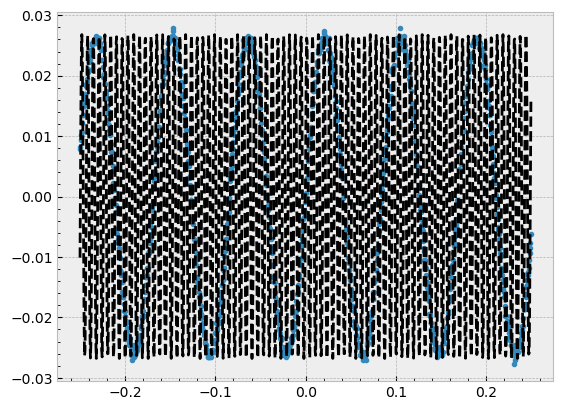

La frec es 12634.166539006841 sugerida: 12633.157894736842
La amp es 0.025800000000000003 amp sugerida 0.0268


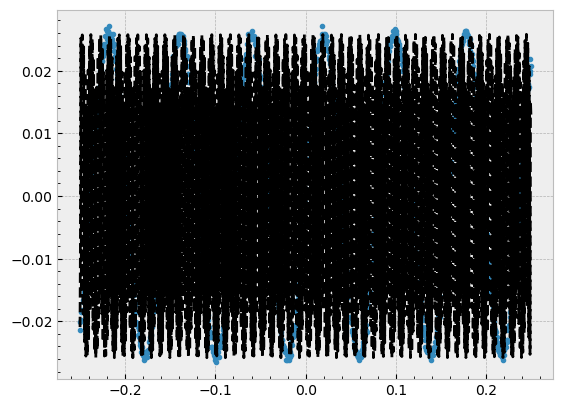

La frec es 13421.71339259054 sugerida: 13422.105263157895
La amp es 0.025800000000000003 amp sugerida 0.0268


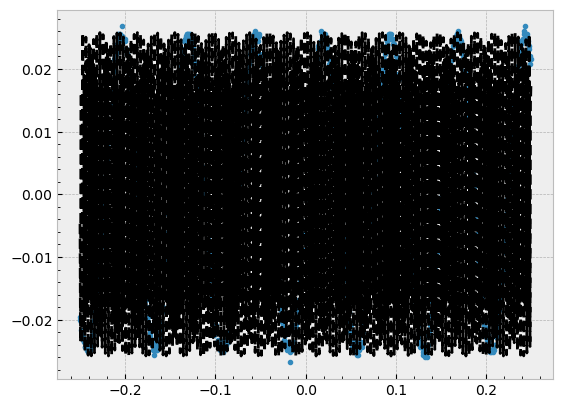

La frec es 14211.673381236606 sugerida: 14211.052631578948
La amp es 0.025000000000000005 amp sugerida 0.026000000000000002


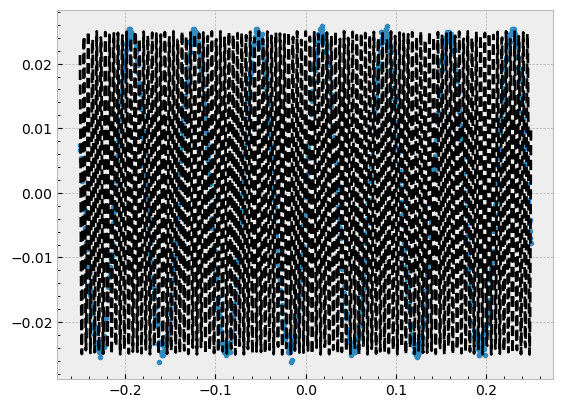

La frec es 14999.998280088012 sugerida: 15000.0
La amp es 0.02579953984148866 amp sugerida 0.0258


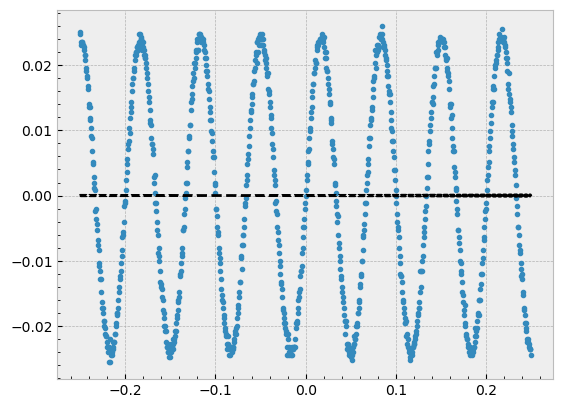

[0.027599788480525755,
 0.030600000000000006,
 0.032600000000000004,
 0.03160000000000001,
 0.03120000000000001,
 0.03140000000000001,
 0.033400000000000006,
 0.029800000000000004,
 0.029200000000000004,
 0.031400000000000004,
 0.028600000000000004,
 0.028800000000000006,
 0.031400000000000004,
 0.027200000000000005,
 0.027600000000000003,
 0.0268,
 0.025800000000000003,
 0.025800000000000003,
 0.025000000000000005,
 0.02579953984148866]

In [71]:
ajustar_sinusoidales(t1, V1, f)

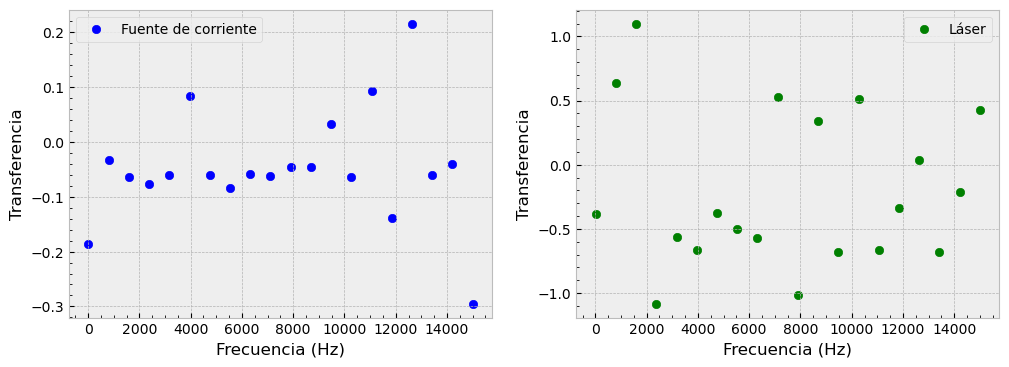

In [26]:
labels = ["Fuente de corriente", "Láser"]
colors = ["b", "g"]
freqs = []
Ts = []

fig, axs = plt.subplots(1,len(labels), figsize=(12,4))
for i, ax in enumerate(fig.axes):
    file_name = f"../mediciones/D.D/{file_names[i]}"
    f, t1, V1, t2, V2, amp1, amp2 = cargar_datos(file_name)

    amp1 = ajustar_sinusoidales(t1, V1, f)
    amp2 = ajustar_sinusoidales(t2, V2, f)
    
    T = np.array(amp2)/np.array(amp1)
    freqs.append(f)
    Ts.append(T)
    ax.scatter(freqs[i], Ts[i], label=f'{labels[i]}', color = f"{colors[i]}")

    ax.set_ylabel('Transferencia') 
    ax.set_xlabel('Frecuencia (Hz)')
    # ax.title(f'R={R}')
    # ax.xscale("log")
    ax.legend()
plt.show()